In [1]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.interpolate import spline

In [3]:
#set index to passenger ID
#ignore unwanted columns when reading in 
trainingData = pd.read_csv('train.csv', index_col='passengerid', usecols=['passengerid', 'survived', 'pclass', 'sex', 'age', 'sib&sp', 'par&ch', 'fare', 'embarked'])

In [4]:
#useful pclass, sex, age, maybe sibsp?
#Not so useful - name, ticket, home.dest... 

trainingData
#type(trainingData)

,survived,pclass,sex,age,sib&sp,par&ch,fare,embarked
passengerid,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,NaN,0,0,8.4583,Q
7,0,1,male,54.0,0,0,51.8625,S
8,0,3,male,2.0,3,1,21.0750,S
9,1,3,female,27.0,0,2,11.1333,S


In [5]:
print('Total Passengers in Training set: ' + str(len(trainingData)))

Total Passengers in Training set: 891


In [6]:
died = trainingData['survived'].count() - trainingData['survived'].sum()
survived = trainingData['survived'].sum()


    
print('Died:  ' + str(died))
print('Survived:  ' + str(survived))

print(str(died/len(trainingData)*100) + " percent death rate")

Died:  549
Survived:  342
61.6161616162 percent death rate


In [30]:
trainingData.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sib&sp      0
par&ch      0
fare        0
embarked    0
dtype: int64

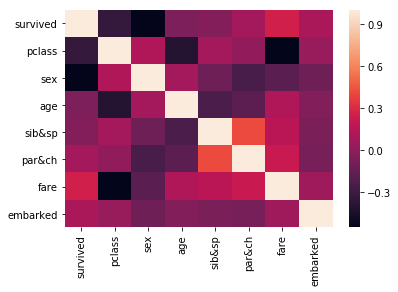

In [32]:
sb.heatmap(trainingData.corr())

# Fixing Variables

In [8]:
def fixAges(passenger):
    
    age = passenger['age']
    pclass = passenger['pclass']
    
    if( np.isnan(age) and not (np.isnan(pclass)) ):
        #checking by class to assign an average age
        if(pclass == 1):
            return int(np.nanmean(trainingData['age'][trainingData['pclass'] == 1]))
        elif(pclass == 2):                
            return int(np.nanmean(trainingData['age'][trainingData['pclass'] == 2]))
        else:
            return int(np.nanmean(trainingData['age'][trainingData['pclass'] == 3]))
    else:
        return age

In [9]:
trainingData['age'] = trainingData.apply(fixAges, axis=1)
#trainingData

In [10]:
trainingData.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sib&sp      0
par&ch      0
fare        0
embarked    2
dtype: int64

In [11]:
trainingData = trainingData.dropna()

In [12]:
print('Total Passengers in Training set: ' + str(len(trainingData)))

Total Passengers in Training set: 889


In [13]:
# must convert categorical/string variables to dummy/numerical indicators

In [14]:
# converting sex column to 1 for male and 0 for female

#trainingData['Sex'] = trainingData['Sex'].apply(lambda sex: 1 if sex=='male' else 0)
#above recieves warning

trainingData.loc[:, 'sex'] = trainingData.loc[:, 'sex'].apply(lambda sex: 1 if sex=='male' else 0)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
#assign 0-2 for port of embarkation
#  0 for S (Southampton) - 1 for C (Cherbourg) - 2 for Q (Queenstown)

trainingData.loc[:, 'embarked'] = trainingData.loc[:, 'embarked'].apply(lambda port: 0 if port=='S' else 1 if port=='C' else 2)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
trainingData

,survived,pclass,sex,age,sib&sp,par&ch,fare,embarked
passengerid,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0
6,0,3,1,25.0,0,0,8.4583,2
7,0,1,1,54.0,0,0,51.8625,0
8,0,3,1,2.0,3,1,21.0750,0
9,1,3,0,27.0,0,2,11.1333,0


# Visualization

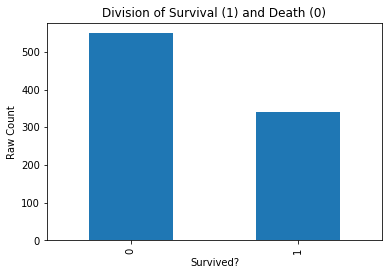

In [17]:
#Pay attention to this
#A 60% accurate model would be unimpressive
trainingData['survived'].value_counts().plot(kind = 'bar')
plt.title('Division of Survival (1) and Death (0)')

plt.xlabel('Survived?')
plt.ylabel('Raw Count')

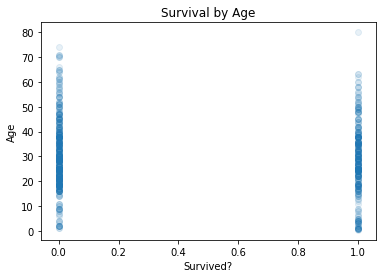

In [18]:
plt.scatter(trainingData['survived'], trainingData['age'], alpha= 0.1)
plt.title('Survival by Age')
plt.ylabel('Age')
plt.xlabel('Survived?')

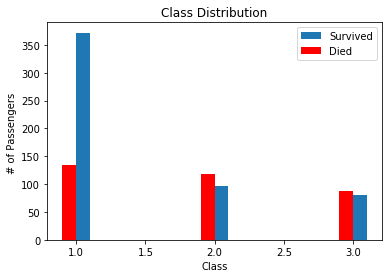

In [19]:
width = 0.1

plt.bar([1,2,3], trainingData['pclass'][trainingData['survived'] == 0].value_counts(), width=width, align='edge')
plt.bar([1,2,3], trainingData['pclass'][trainingData['survived'] == 1].value_counts(), width=-width, color='red', align='edge')

plt.title("Class Distribution")
plt.xlabel('Class')
plt.ylabel('# of Passengers ')
plt.legend(('Survived', 'Died'),loc='best') 

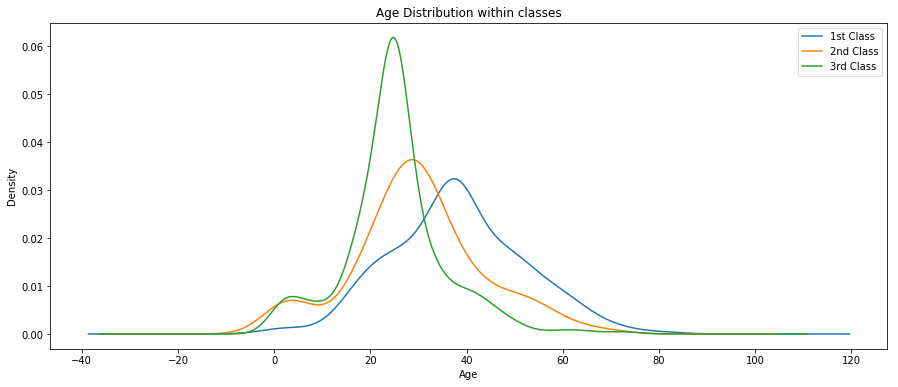

In [20]:
fig = plt.figure(figsize=(15,6))

#kernel density estimation to smoooooth
#older passengers more likely ot be in the more expensive classes
trainingData['age'][trainingData['pclass'] == 1].plot(kind ='kde') 
trainingData['age'][trainingData['pclass'] == 2].plot(kind ='kde')
trainingData['age'][trainingData['pclass'] == 3].plot(kind ='kde')

plt.xlabel("Age")    
plt.title("Age Distribution within classes")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

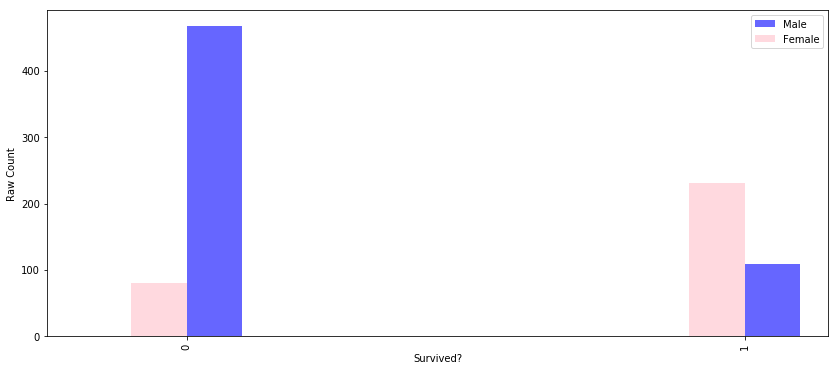

In [21]:
#Gender? 
fig = plt.figure(figsize=(14,6))

maleData = trainingData['survived'][trainingData['sex'] == 1].value_counts().sort_index()
femaleData = trainingData['survived'][trainingData['sex'] == 0].value_counts().sort_index()

maleData.plot('bar', color='blue', alpha=0.6, width=0.10, align='edge')
femaleData.plot('bar', color='pink', alpha=0.6, width=-0.10, align='edge')
plt.legend(('Male', 'Female'),loc='best') 
plt.xlabel('Survived?')
plt.ylabel('Raw Count')


(-0.5, 0.5)

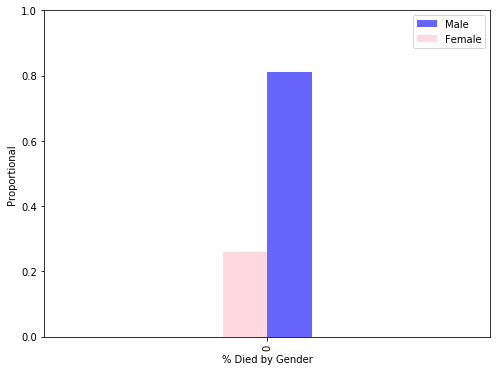

In [22]:
#Percentagewise
#~25% of makes survived and ~85% females 
fig = plt.figure(figsize=(8,6))

maleData = trainingData['survived'][trainingData['sex'] == 1].value_counts().sort_index()
femaleData = trainingData['survived'][trainingData['sex'] == 0].value_counts().sort_index()

(maleData/maleData.sum()).plot('bar', color='blue', alpha=0.6, width=0.10, align='edge')
(femaleData/femaleData.sum()).plot('bar', color='pink', alpha=0.6, width=-0.10, align='edge')

plt.legend(('Male', 'Female'),loc='best') 
plt.xlabel('% Died by Gender')
plt.ylabel('Proportional')
plt.ylim(0.0,1.0)
plt.xlim(-0.5, 0.5)

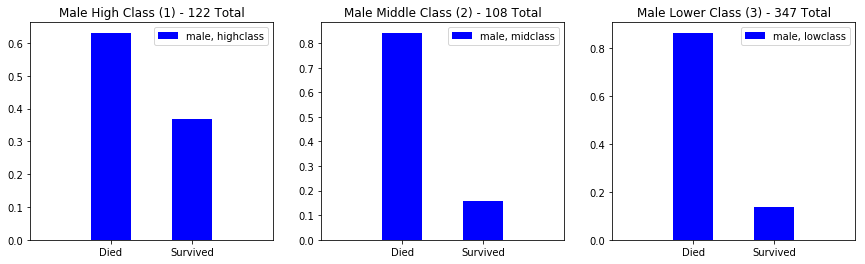

In [27]:
#What about class by gender
fig = plt.figure(figsize=(20,4))

ax0=fig.add_subplot(141)
male_class1 = trainingData['survived'][trainingData['sex'] == 1][trainingData['pclass'] == 1].value_counts()
(male_class1/male_class1.sum()).plot(kind='bar', label='male, highclass', color='blue')
ax0.axes.set_xticklabels(["Died", "Survived"], rotation=0)
ax0.set_xlim(-1, 2)
plt.title("Male High Class (1) - " + str(male_class1.sum()) + " Total") 
plt.legend()

ax1=fig.add_subplot(142)
male_class2 = trainingData['survived'][trainingData['sex'] == 1][trainingData['pclass'] == 2].value_counts()
(male_class2/male_class2.sum()).plot(kind='bar', label='male, midclass', color='blue')
ax1.axes.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, 2)
plt.title("Male Middle Class (2) - " + str(male_class2.sum()) + " Total") 
plt.legend()

ax1=fig.add_subplot(143)
male_class3 = trainingData['survived'][trainingData['sex'] == 1][trainingData['pclass'] == 3].value_counts()
(male_class3/male_class3.sum()).plot(kind='bar', label='male, lowclass', color='blue')
ax1.axes.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, 2)
plt.title("Male Lower Class (3) - " + str(male_class3.sum()) + " Total") 
plt.legend()

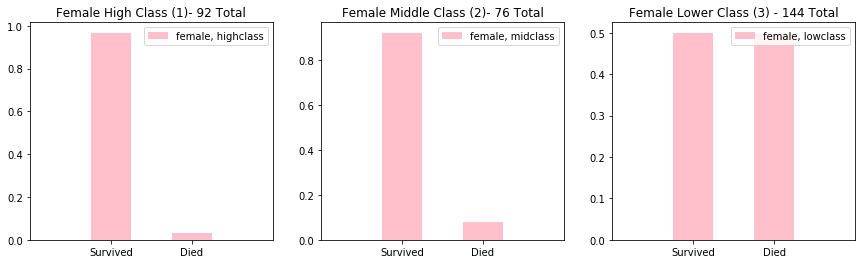

In [25]:
fig = plt.figure(figsize=(20,4))

ax0=fig.add_subplot(141)
female_class1 = trainingData['survived'][trainingData['sex'] == 0][trainingData['pclass'] == 1].value_counts()
(female_class1/female_class1.sum()).plot(kind='bar', label='female, highclass', color='pink')
ax0.axes.set_xticklabels(["Survived", "Died"], rotation=0)
ax0.set_xlim(-1, 2)
plt.title("Female High Class (1) - " + str(female_class1.sum()) + " Total") 
plt.legend()

ax1=fig.add_subplot(142)
female_class2 = trainingData['survived'][trainingData['sex'] == 0][trainingData['pclass'] == 2].value_counts()
(female_class2/female_class2.sum()).plot(kind='bar', label='female, midclass', color='pink')
ax1.axes.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, 2)
plt.title("Female Middle Class (2) - " + str(female_class2.sum()) + " Total") 
plt.legend()

ax1=fig.add_subplot(143)
female_class3 = trainingData['survived'][trainingData['sex'] == 0][trainingData['pclass'] == 3].value_counts()
(female_class3/female_class3.sum()).plot(kind='bar', label='female, lowclass', color='pink')
ax1.axes.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, 2)
plt.title("Female Lower Class (3) - " + str(female_class3.sum()) + " Total") 
plt.legend()

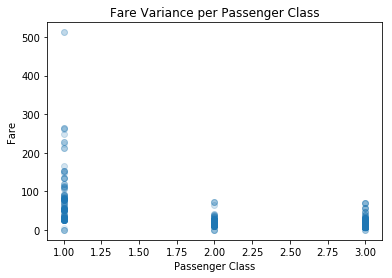

In [43]:
#Are fare and class independent?
plt.scatter(trainingData['pclass'], trainingData['fare'], alpha= 0.1)
plt.title('Fare Variance per Passenger Class')
plt.ylabel('Fare')
plt.xlabel('Passenger Class')

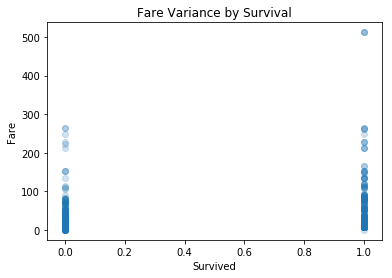

In [53]:
#Did the fare paid effect survival
plt.scatter(trainingData['survived'], trainingData['fare'], alpha= 0.2)
plt.title('Fare Variance by Survival')
plt.ylabel('Fare')
plt.xlabel('Survived')

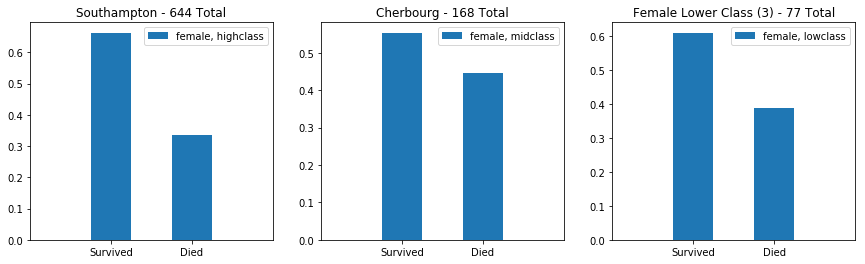

In [54]:
#Did port of embarkation effect survival rate
fig = plt.figure(figsize=(20,4))

ax0=fig.add_subplot(141)
embarked_S = trainingData['survived'][trainingData['embarked'] == 0].value_counts()
(embarked_S/embarked_S.sum()).plot(kind='bar', label='female, highclass')
ax0.axes.set_xticklabels(["Survived", "Died"], rotation=0)
ax0.set_xlim(-1, 2)
plt.title("Southampton - " + str(embarked_S.sum()) + " Total") 
plt.legend()

ax1=fig.add_subplot(142)
embarked_C = trainingData['survived'][trainingData['embarked'] == 1].value_counts()
(embarked_C/embarked_C.sum()).plot(kind='bar', label='female, midclass')
ax1.axes.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, 2)
plt.title("Cherbourg - " + str(embarked_C.sum()) + " Total") 
plt.legend()

ax1=fig.add_subplot(143)
embarked_Q = trainingData['survived'][trainingData['embarked'] == 2].value_counts()
(embarked_Q/embarked_Q.sum()).plot(kind='bar', label='female, lowclass')
ax1.axes.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, 2)
plt.title("Female Lower Class (3) - " + str(embarked_Q.sum()) + " Total") 
plt.legend()

# Implementing Logistic Regression